# Week 4

## Introduction to Numpy, Pandas and Scikit-Learn

Alexander Goncearenco

### What are the keystones of Data Analysis

* Formulating Questions

* Data wrangling: gather, access, clean
(Week 6)

* Exploratory data analysis
Week 5 (visualization), Week 6, Week 9-10 unsupervised learning, feature selection

* Making conclusions and predictions: modeling, machine learning
(Weeks 7-9, 11)

* Reporting and communication (Week 5, Week 13)

### Working with data in Python

Data types and data structures - 
containers to hold, access and modify data efficiently.

Our options:
- Python built-in data types
- Python built-in data structures and functions
- Python packages extend the built-in capabilities (packages in standard library and pip)
- 3rd party tools. We can always run a specialized software tools from Python

### Built-in data types, structures and functions

* int, float, complex
* dict, list, set and frozenset, tuple, str, bytes
* https://docs.python.org/3/library/stdtypes.html
* https://docs.python.org/3/library/datatypes.html


### List

In [53]:
a = [1,2,3,4,5]
print(a[0])
print(a[-1])

1
5


In [54]:
print(a[:])
print(a[:3], a[3:])
print(a[0:3], a[3:5])

[1, 2, 3, 4, 5]
[1, 2, 3] [4, 5]
[1, 2, 3] [4, 5]


In [58]:
print(a[slice(0, 3)])
print(type(slice(0, 3)))

[1, 2, 3]
<class 'slice'>


In [36]:
print(a[::2])

[1, 3, 5]
[2, 4]


In [46]:
del a[::2]
print(a)

[2, 4]


In [47]:
from math import sin
print([sin(x) for x in range(4)])

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672]


### Arrays in Python

* list
* array 1-dimensional https://docs.python.org/3/library/array.html
* numpy supports multidimensional arrays

In [13]:
from array import array
from statistics import mean

al = array('l', [1, 2, 3, 4, 5])
print(al)
print(sum(al), mean(al))

array('l', [1, 2, 3, 4, 5])
15 3
array('d', [1.0, 2.0, 3.14])
6.140000000000001 2.046666666666667
array('l', [1, 2, 3, 4, 5, 1, 2, 3, 4, 5])


In [17]:
ad = array('d', [1.0, 2.0, 3.14])
print(ad)
print(sum(ad), mean(ad))

array('d', [1.0, 2.0, 3.14])
6.140000000000001 2.046666666666667


In [23]:
# However:
print(2 * ad)

print(ad + ad)

array('d', [1.0, 2.0, 3.14, 1.0, 2.0, 3.14])
array('d', [1.0, 2.0, 3.14, 1.0, 2.0, 3.14])


### Other numeric issues

In [66]:
0.1 + 0.1 + 0.1 == 0.3

False

In [67]:
from decimal import Decimal

Decimal('0.1') + Decimal('0.1') + Decimal('0.1') == Decimal('0.3')

True

### Overview of packages

* __numpy__  - N-dimensional arrays and algebra
* scipy - scientific computing
* __pandas__  - data structures & analysis
* __matplotlib__, seaborn - plotting
* __jupyter__ - notebook, integration with pandas and plotting
* __scikit-learn (sklearn)__  - Machine learning
* statistics - standard package - basic descriptive statistics
* statsmodels - statistical modeling, hypothesis testing

### Datasets:

* https://catalog.data.gov/dataset
* http://mlr.cs.umass.edu/ml/datasets.html
* https://www.kaggle.com/datasets
* https://opendata.socrata.com


__Tabular data__: database tables, Excel, CSV


### Accessing data

* Example datasets "red wine quality"
* Download CSV from https://archive.ics.uci.edu/ml/datasets/wine+quality

In [80]:
winequality_file = "week4-files/winequality-red.csv"

In [81]:
from itertools import islice

with open(winequality_file) as f:
    for line in islice(f, 0, 5):
        print(line.split(","))

# exclude header and line endings, convert to float

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality\n']
['7.4', '0.7', '0.0', '1.9', '0.076', '11.0', '34.0', '0.9978', '3.51', '0.56', '9.4', '5\n']
['7.8', '0.88', '0.0', '2.6', '0.098', '25.0', '67.0', '0.9968', '3.2', '0.68', '9.8', '5\n']
['7.8', '0.76', '0.04', '2.3', '0.092', '15.0', '54.0', '0.997', '3.26', '0.65', '9.8', '5\n']
['11.2', '0.28', '0.56', '1.9', '0.075', '17.0', '60.0', '0.998', '3.16', '0.58', '9.8', '6\n']


In [92]:
# Python CSVReader
import csv

with open(winequality_file) as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in islice(reader, 0, 5):
        print(', '.join(row))

fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality
7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5
7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8, 5
7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8, 5
11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8, 6


In [99]:
# Python CSVReader
import csv

with open(winequality_file) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in islice(reader, 0, 3):
        print(', '.join(row.values()))
        
print(row.keys())
print(row['pH'])
# limitations - data structure is not suitable for data analysis

7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5
7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8, 5
7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8, 5
odict_keys(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
3.26


In [115]:
# Numpy: read CSV
from numpy import genfromtxt
wine_np = genfromtxt(winequality_file, delimiter=',', skip_header=1)
print(wine_np)
print(wine_np.shape)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
(1599, 12)


In [372]:
# Pandas: read CSV
from pandas import read_csv
wine_df = read_csv(winequality_file, sep=',',header=0)
print(wine_df.shape)
wine_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [133]:
# numpy array operations:
print(wine_np[0,0])  # first element
print(wine_np[0,...]) # row
print(wine_np[...,0]) # column

pH = wine_np[...,8]
print(pH.min(), pH.mean(), pH.max())

7.4
[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4     5.    ]
[7.4 7.8 7.8 ... 6.3 5.9 6. ]
2.74 3.3111131957473416 4.01


In [149]:
# filtering
print(wine_np[pH < 3.2, ...])
print(wine_np[pH < 3.2, ...].shape)

[[11.2   0.28  0.56 ...  0.58  9.8   6.  ]
 [ 8.9   0.62  0.18 ...  0.88  9.2   5.  ]
 [ 8.9   0.62  0.19 ...  0.93  9.2   5.  ]
 ...
 [ 7.8   0.82  0.29 ...  0.53  9.4   5.  ]
 [ 8.4   0.37  0.43 ...  0.81 11.2   7.  ]
 [11.2   0.4   0.5  ...  0.58 10.4   5.  ]]
(349, 12)


In [154]:
import numpy as np

empty_array = np.zeros((3,4,2))
empty_array

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [155]:
np.random.rand(3,4,2)

array([[[0.28268479, 0.83570526],
        [0.17125463, 0.95556268],
        [0.44067533, 0.72011812],
        [0.83891375, 0.20227388]],

       [[0.35084935, 0.52743129],
        [0.59326902, 0.79233107],
        [0.42292945, 0.85107648],
        [0.65586349, 0.76271854]],

       [[0.81392824, 0.32268594],
        [0.58877114, 0.35374821],
        [0.80658897, 0.5283861 ],
        [0.65066129, 0.23884383]]])

In [274]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

np.random.seed?

# learn how to invoke docstring help

In [281]:
np.random.seed(0)
print(np.random.rand(3))

np.random.seed(0)
print(np.random.rand(3))

np.random.seed(1000)
print(np.random.rand(3))

[0.5488135  0.71518937 0.60276338]
[0.5488135  0.71518937 0.60276338]
[0.65358959 0.11500694 0.95028286]


In [278]:
wine_np[0:3, 8]  # pH values for 3 first wines in the array

array([3., 3., 3.])

In [161]:
# changing values
wine_np[0:3, 8] = [3., 3., 3.]
wine_np[0:3, 8]

array([3., 3., 3.])

In [163]:
wine_np.dtype.name

# change it with wine_np.astype(int)

'float64'

In [171]:
print(pH)
print(2*pH)
print(pH + pH)
print(np.exp(pH))

[3.   3.   3.   ... 3.42 3.57 3.39]
[6.   6.   6.   ... 6.84 7.14 6.78]
[6.   6.   6.   ... 6.84 7.14 6.78]
[20.08553692 20.08553692 20.08553692 ... 30.56941502 35.51659315
 29.66595227]


In [195]:
M = wine_np[0:2, 0:3]
print(M)
print()
print(M.T)

[[7.4  0.7  0.  ]
 [7.8  0.88 0.  ]]

[[7.4  7.8 ]
 [0.7  0.88]
 [0.   0.  ]]


In [207]:
M.dot(M.T) # matrix multiplication

array([[55.25  , 58.336 ],
       [58.336 , 61.6144]])

In [209]:
M.T.dot(M) # matrix multiplication

array([[115.6   ,  12.044 ,   0.    ],
       [ 12.044 ,   1.2644,   0.    ],
       [  0.    ,   0.    ,   0.    ]])

In [210]:
x = np.array([3,3,3])
M*x  # multiply rows by x. This is a broadcasting operation

array([[22.2 ,  2.1 ,  0.  ],
       [23.4 ,  2.64,  0.  ]])

### Broadcasting in numpy:
 - The last dimension of each array is compared.
 - If the dimension lengths are equal, or one of the dimensions is of length 1, then we keep going.
 - If the dimension lengths are not equal, and none of the dimensions have length 1, then there's an error.
 - Continue checking dimensions until the shortest array is out of dimensions.

In [228]:
M.dot(x) # matrix multiplication

array([24.3 , 26.04])

In [232]:
# but not this:
x.dot(M)  # try to fix it

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In [233]:
print(type(wine_np)) # ndarray object
print(wine_np.shape) # note, shape is attribute
wine_np.sum()  # sum() is method

<class 'numpy.ndarray'>
(1599, 12)


152083.81193999999

In [225]:
wine_np.sum(axis=0)  # collapsed dimensions

array([13303.1    ,   843.985  ,   433.29   ,  4059.55   ,   139.859  ,
       25384.     , 74302.     ,  1593.79794,  5293.5    ,  1052.38   ,
       16666.35   ,  9012.     ])

In [226]:
wine_np.sum(axis=1)

array([ 74.0338 , 122.8548 ,  99.439  , ..., 100.48174, 105.21547,
        92.49249])

In [236]:
# Pandas Dataframe (as in R)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [297]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [300]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [240]:
wine_df['pH'].head()

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

In [245]:
wine_df['pH'].head(5)

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

In [246]:
wine_df['pH'][:5]

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

In [247]:
wine_df[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [248]:
wine_df[:5]['pH']

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

In [250]:
wine_df[:5][['chlorides', 'pH']]

,chlorides,pH
0,0.076,3.51
1,0.098,3.20
2,0.092,3.26
3,0.075,3.16
4,0.076,3.51


In [252]:
wine_df[['chlorides', 'pH']][:5]

,chlorides,pH
0,0.076,3.51
1,0.098,3.20
2,0.092,3.26
3,0.075,3.16
4,0.076,3.51


In [282]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
wine_df['quality'].nunique()

In [255]:
# a histogram by quality
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

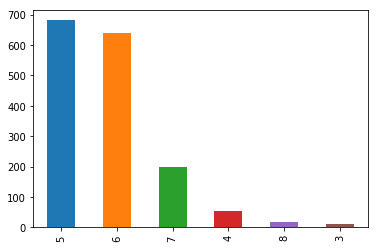

In [259]:
%matplotlib inline
wine_df['quality'].value_counts().plot(kind='bar')

In [261]:
wine_df['quality'] == 3

# This is a big array of Trues and Falses, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where.

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1569    False
1570    False
1571    False
1572    False
1573    False
1574    False
1575    False
1576    False
1577    False
1578    False
1579    False
1580    False
1581    False
1582    False
1583    False
1584    False
1585    False
1586    False
1587    False
1588    False
1589    False
1590    False
1591    False
1592    False
1593    False
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

In [264]:
# You can also combine more than one condition with the & operator like this:
bad_wine = wine_df['quality'] == 3
acidic_wine = wine_df['pH'] < 3.3

wine_df[bad_wine & acidic_wine]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3
517,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3


In [266]:
# pandas columns are numpy arrays internally
import pandas as pd

pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [268]:
pd.Series([1,2,3]).values

array([1, 2, 3])

In [285]:
np.mean(wine_df['pH'].values)

3.3111131957473416

In [290]:
# group by 
print(wine_df.groupby('quality'))

In [292]:
wine_df.groupby('quality')['alcohol'].mean()

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

In [293]:
wine_sorted = wine_df.sort_values(['alcohol'], ascending=False)
wine_sorted.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6


In [298]:
wine_sorted.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
371,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
528,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,6
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
517,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3


In [317]:
# loc gets rows (or columns) with particular labels from the index.
wine_df.loc[544:545]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.0008,2.86,0.79,8.4,6
545,9.1,0.47,0.49,2.6,0.094,38.0,106.0,0.9982,3.08,0.59,9.1,5


In [318]:
# iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
wine_df.iloc[544:545]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.0008,2.86,0.79,8.4,6


In [330]:
wine_df.loc[:3, 'pH']

0    3.51
1    3.20
2    3.26
3    3.16
Name: pH, dtype: float64

In [334]:
wine_df.iloc[:3, 8]

0    3.51
1    3.20
2    3.26
Name: pH, dtype: float64

In [357]:
wine_df.at[0, 'pH']

3.5

In [355]:
wine_df.iat[0, 8]

3.5

In [345]:
wine_df.at[0, 'pH'] = 3.50
wine_df.at[0, 'pH']

3.5

In [375]:
wine_df.at[0, 'body'] = 'full'
wine_df.at[1, 'body'] = 'light'
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,body
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,full
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,light
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN


In [379]:
print(wine_df['body'].isna().head())
wine_df.loc[wine_df['body'].isna(), 'quality'] = 0
wine_df.head()

0    False
1    False
2     True
3     True
4     True
Name: body, dtype: bool


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,body
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,full
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,light
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,NaN


In [383]:
# transpose
wine_df.T

,0,1,2,3,4,5,6,7,8,9,...,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
fixed acidity,7.4,7.8,7.8,11.2,7.4,7.4,7.9,7.3,7.8,7.5,...,6.6,6.3,5.4,6.3,6.8,6.2,5.9,6.3,5.9,6
volatile acidity,0.7,0.88,0.76,0.28,0.7,0.66,0.6,0.65,0.58,0.5,...,0.725,0.55,0.74,0.51,0.62,0.6,0.55,0.51,0.645,0.31
citric acid,0,0,0.04,0.56,0,0,0.06,0,0.02,0.36,...,0.2,0.15,0.09,0.13,0.08,0.08,0.1,0.13,0.12,0.47
residual sugar,1.9,2.6,2.3,1.9,1.9,1.8,1.6,1.2,2,6.1,...,7.8,1.8,1.7,2.3,1.9,2,2.2,2.3,2,3.6
chlorides,0.076,0.098,0.092,0.075,0.076,0.075,0.069,0.065,0.073,0.071,...,0.073,0.077,0.089,0.076,0.068,0.09,0.062,0.076,0.075,0.067
free sulfur dioxide,11,25,15,17,11,13,15,15,9,17,...,29,26,16,29,28,32,39,29,32,18
total sulfur dioxide,34,67,54,60,34,40,59,21,18,102,...,79,35,26,40,38,44,51,40,44,42
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978,...,0.9977,0.99314,0.99402,0.99574,0.99651,0.9949,0.99512,0.99574,0.99547,0.99549
pH,3.51,3.2,3.26,3.16,3.51,3.51,3.3,3.39,3.36,3.35,...,3.29,3.32,3.67,3.42,3.42,3.45,3.52,3.42,3.57,3.39
sulphates,0.56,0.68,0.65,0.58,0.56,0.56,0.46,0.47,0.57,0.8,...,0.54,0.82,0.56,0.75,0.82,0.58,0.76,0.75,0.71,0.66


In [ ]:
wine_df.T.to_csv('transposed.csv', index=False)

In [ ]:
pd.merge?

In [ ]:
pd.cat?

<img src="http://scikit-learn.org/stable/_static/ml_map.png" width=700>